## ML-1 Mini Project
### Topic: Spotify's song analysis
### Project overview: 
<p>In this mini-project, we have to tried to analyse in-depth the Spotify Dataset on Kaggle. Link <a href="https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify">here</a>. </p> 

<p>We started with the basic EDA on the dataset. 
<ol>
    <li>Removing null values
    <li>Dropping irrelevant columns
    <li>And finally we have done data visualization using 3 different libraries for different use-cases to make plots more attractive as well as usable - <b>Matplotlib, Seaborn, Plotly</b>.
</ol>

### Project By:
    Aryan Mehta - 60009200013
    Arihant Sheth - 60009200021

### Making necessary imports

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Reading the dataset

In [50]:
data = pd.read_csv(r'/content/genres_v2.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [52]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [53]:
data.shape

(42305, 22)

In [54]:
data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [55]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'title'],
      dtype='object')

In [56]:
data.drop("duration_ms", axis = 1, inplace = True)

### We will mainly work with numerical data from the used dataset as we can extract a lot of features from it.

In [57]:
numeric_data = data._get_numeric_data()
numeric_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4


In [58]:
numeric_data.shape

(42305, 12)

In [59]:
numeric_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,5.000000


In [60]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  time_signature    42305 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 3.9 MB


### These are all attributes that describe a song as well as one possibly can. 
The likeability of a song is a really subjective topic. Hence, we divide our songs into different features such as 
<ul>
    <li>danceability
    <li>energy
    <li>key
    <li>loudness
    <li>mode
    <li>speechiness
    <li>acousticness
    <li>instrumentalness
    <li>liveness
    <li>valence
    <li>time_signature

### 1. Viewing 'Outliers':
Now, here I have mentioned Outliers in quotes. The reason for doing that is that though these values might be statistical outliers, they are still true values for real songs present on Spotify. So, for analysis of the dataset, it is not advisable to remove them.

In [61]:
#fig = px.box(data,y = 'duration_ms')
#fig.show()

### 2. Analysing correlation:
As we can see, most of these features are completely un-correlated with correlation 

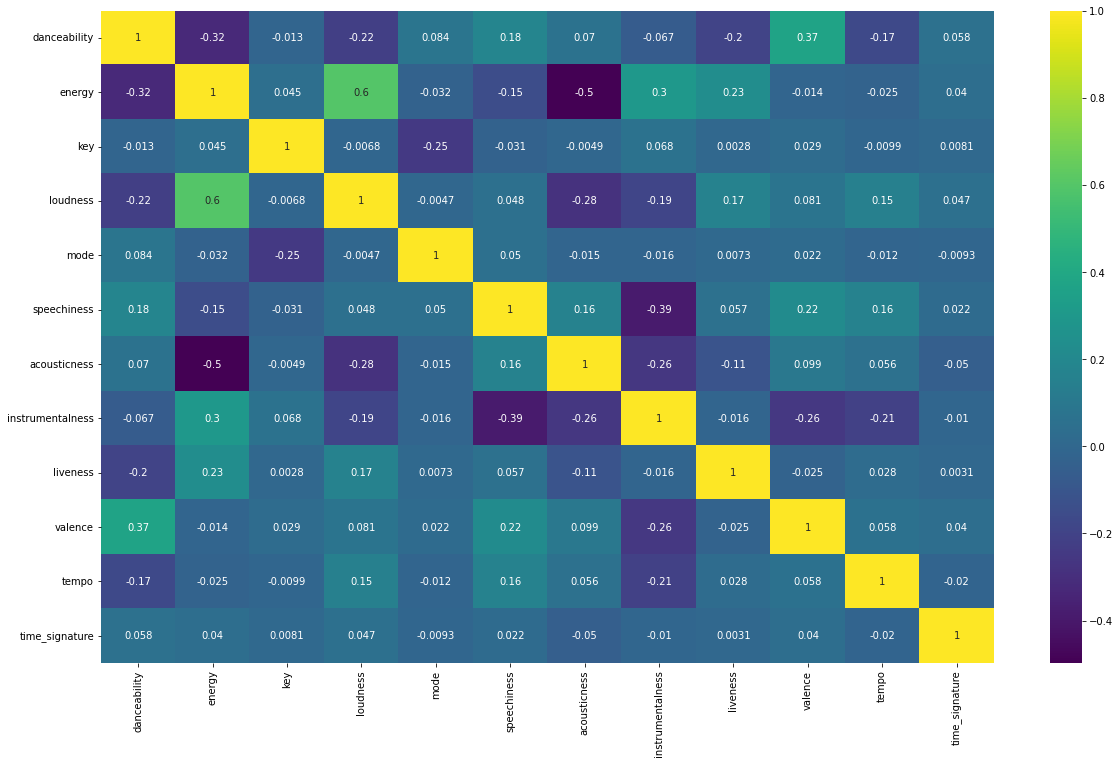

In [62]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

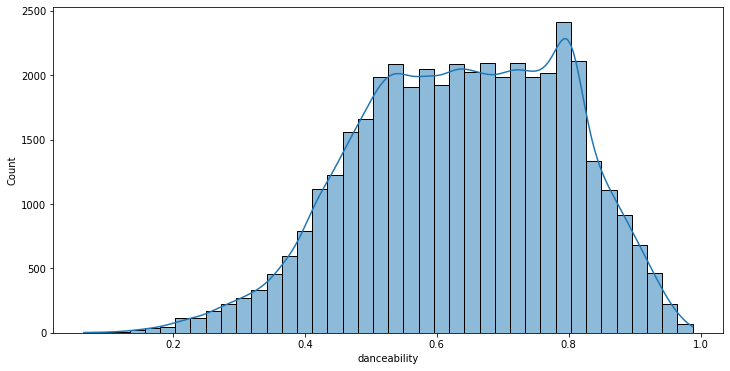

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(data.danceability, bins=40, kde=True)
plt.show()

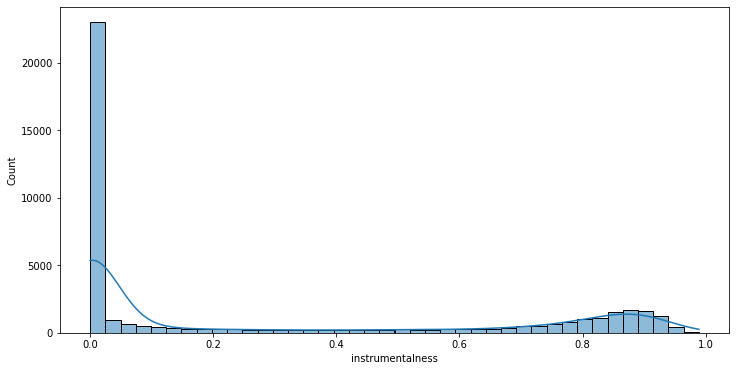

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(data.instrumentalness, bins=40, kde=True)
plt.show()

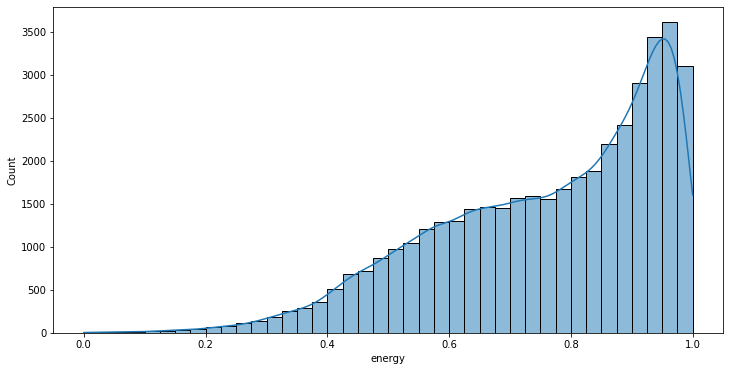

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(data.energy, bins=40, kde=True)
plt.show()

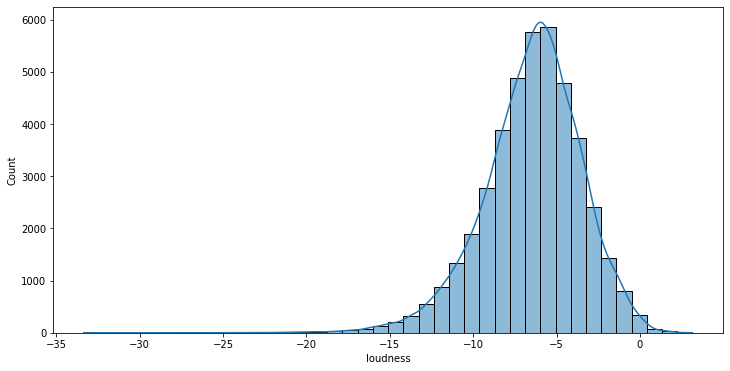

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(data.loudness, bins=40, kde=True)
plt.show()

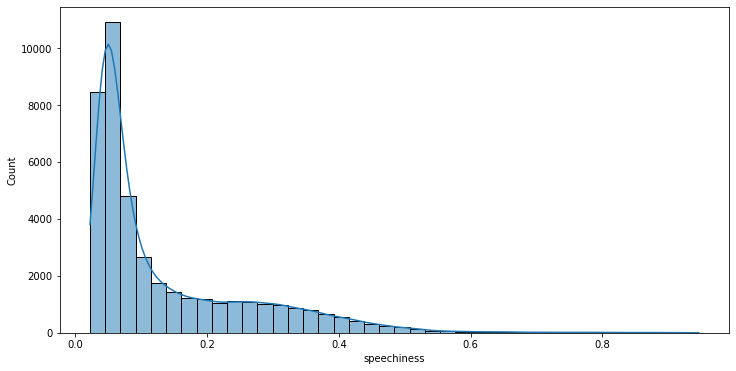

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(data.speechiness, bins=40, kde=True)
plt.show()

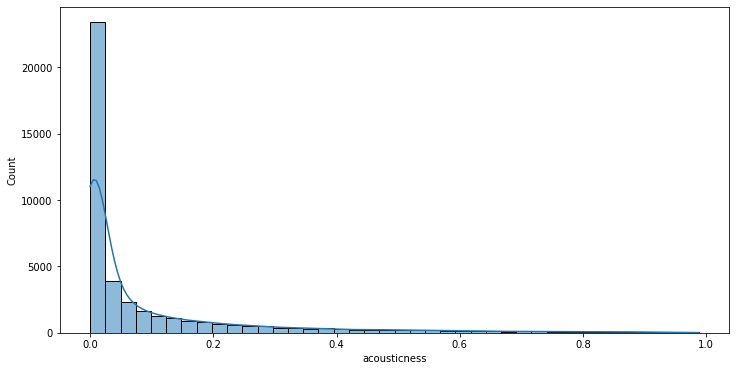

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(data.acousticness, bins=40, kde=True)
plt.show()

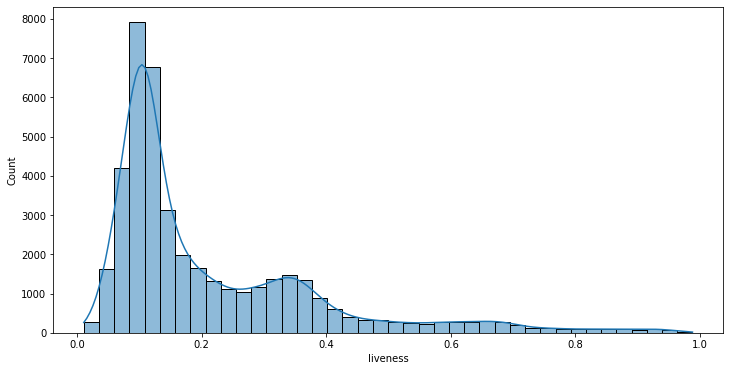

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data.liveness, bins=40, kde=True)
plt.show()

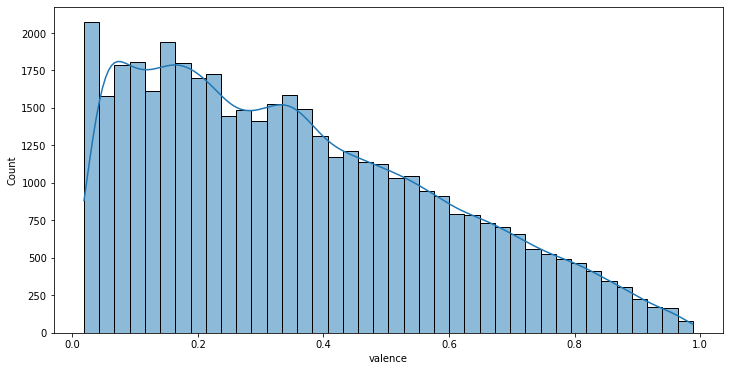

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(data.valence, bins=40, kde=True)
plt.show()

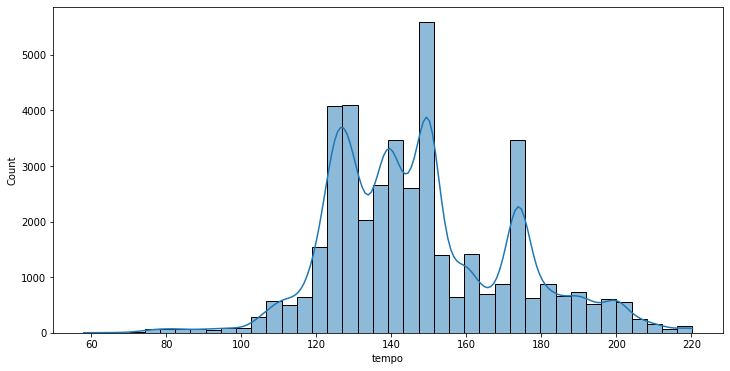

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(data.tempo, bins=40, kde=True)
plt.show()

In [72]:
data.genre.value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [73]:
px.pie(data.genre,
       labels = data.genre.value_counts().values,
       values = data.genre.value_counts().values,
       names = data.genre.value_counts().index,
       title = "Distribution of Genres on Spotify",
       hover_name = data.genre.value_counts().values,
       width = 800,
       height = 500
      )

In [74]:
px.histogram(data.genre)

### Clustering the given songs into playlists using un-supervised learning methods such as K-Means Clustering

In [75]:
numeric_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [76]:
numeric_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4


In [77]:
numeric_data.shape

(42305, 12)

In [78]:
numeric_data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=420).fit(numeric_data)

In [83]:
type(kmeans.labels_)

numpy.ndarray

Here, we have divided our dataset of 42,000+ songs into 420 different playlists by using K-Means Clustering algorithm. This dataset did not have a simple value to predict using Supervised Learning. Hence, we performed heavy Data Analysis to get the best features and visualize our data an then divided them into different playlists with similar songs rather than just having one genre songs in a playlist. 

In [82]:
data[kmeans.labels_ == np.random.randint(0, 420)]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,genre,song_name,title
252,0.581,0.662,9,-5.239,1,0.3030,0.01530,0.000000,0.1110,0.434,186.046,audio_features,1wJRveJZLSb1rjhnUHQiv6,spotify:track:1wJRveJZLSb1rjhnUHQiv6,https://api.spotify.com/v1/tracks/1wJRveJZLSb1...,https://api.spotify.com/v1/audio-analysis/1wJR...,4,Dark Trap,Swervin (feat. 6ix9ine),NaN
747,0.603,0.719,9,-5.923,1,0.0662,0.00071,0.000000,0.1490,0.063,187.302,audio_features,0JUP3xIQV5w2WfHn7Wyc0J,spotify:track:0JUP3xIQV5w2WfHn7Wyc0J,https://api.spotify.com/v1/tracks/0JUP3xIQV5w2...,https://api.spotify.com/v1/audio-analysis/0JUP...,4,Dark Trap,Safe Star,NaN
866,0.930,0.550,11,-5.959,1,0.1570,0.08900,0.000000,0.1110,0.393,187.988,audio_features,7Ekuj4IetcyH8Y4xueKap8,spotify:track:7Ekuj4IetcyH8Y4xueKap8,https://api.spotify.com/v1/tracks/7Ekuj4IetcyH...,https://api.spotify.com/v1/audio-analysis/7Eku...,4,Dark Trap,Talk,NaN
2143,0.830,0.910,9,-4.631,1,0.1850,0.04550,0.000367,0.3230,0.736,188.000,audio_features,4xziwMELQnVQHbb94B51xk,spotify:track:4xziwMELQnVQHbb94B51xk,https://api.spotify.com/v1/tracks/4xziwMELQnVQ...,https://api.spotify.com/v1/audio-analysis/4xzi...,4,Dark Trap,Na Na Na Na Na (Caught Slippin),NaN
4583,0.739,0.856,9,-5.178,0,0.6150,0.41000,0.000026,0.1000,0.498,186.137,audio_features,5Qt9JOhdYDkH30Qi8SRS1e,spotify:track:5Qt9JOhdYDkH30Qi8SRS1e,https://api.spotify.com/v1/tracks/5Qt9JOhdYDkH...,https://api.spotify.com/v1/audio-analysis/5Qt9...,4,Underground Rap,My Time,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,0.706,0.919,10,-5.054,0,0.2690,0.02010,0.000000,0.2690,0.805,185.416,audio_features,1wCcCCocowxdDF0igFaFgh,spotify:track:1wCcCCocowxdDF0igFaFgh,https://api.spotify.com/v1/tracks/1wCcCCocowxd...,https://api.spotify.com/v1/audio-analysis/1wCc...,4,Hiphop,Skandalouz,NaN
21395,0.778,0.837,11,-5.441,0,0.0875,0.01120,0.000000,0.0306,0.673,187.848,audio_features,2hMjFf0cd7ejP4K7pfeoLU,spotify:track:2hMjFf0cd7ejP4K7pfeoLU,https://api.spotify.com/v1/tracks/2hMjFf0cd7ej...,https://api.spotify.com/v1/audio-analysis/2hMj...,4,Hiphop,The Wash,NaN
21408,0.670,0.675,9,-5.637,1,0.1960,0.00529,0.000003,0.3120,0.686,185.903,audio_features,6PM1sGUlHGCssd7nTPuuYa,spotify:track:6PM1sGUlHGCssd7nTPuuYa,https://api.spotify.com/v1/tracks/6PM1sGUlHGCs...,https://api.spotify.com/v1/audio-analysis/6PM1...,4,Hiphop,We Right Here,NaN
21499,0.823,0.818,10,-4.396,0,0.1800,0.17300,0.013600,0.2100,0.844,185.946,audio_features,7uJvH1U5rhQBEwJILAyA3D,spotify:track:7uJvH1U5rhQBEwJILAyA3D,https://api.spotify.com/v1/tracks/7uJvH1U5rhQB...,https://api.spotify.com/v1/audio-analysis/7uJv...,4,Hiphop,Write This Down (feat. Nieve),NaN
